Tutorial: Sub-Grids (Optional)
==============================

Throughout chapter 1, we used two dimensional grids of $(y,x)$ coordinates to calculate properties of light and mass
profiles and perform lensing ray-tracing calculations.

Sub-grids perform these calculations on an up-sampled grid containing multiple 'sub-pixels' for each pixel on the grid.
Light profiles and mass profiles are then evaluated on every $(y,x)$ sub-coordinate and 'binned up' as the mean of
these values, ensuring their properties are calculated accurately.

This tutorial describes sub-grids. It is considered optional as the default sub-grid options of **PyAutoLens** are
sufficient for the majority of calculations to be performed accurately without customization.

In [1]:
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


To create a `Grid2D` with a sub-grid we input a `sub_size`, which defines how each pixel on the 2D grid is split 
into sub-pixels of size (`sub_size` x `sub_size`). 

These additional pixels are used to perform calculations more accurately.

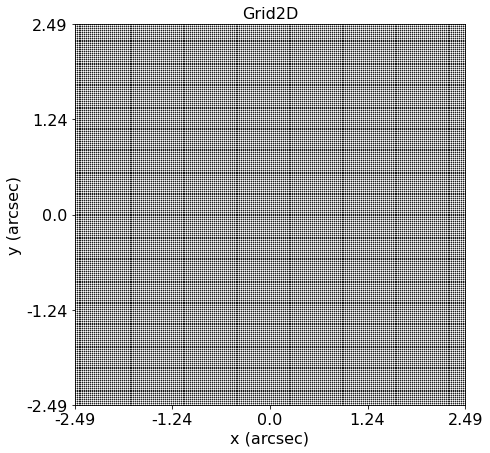

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05, sub_size=2)
grid_plotter = aplt.Grid2DPlotter(grid=grid)
grid_plotter.figure_2d()

We specified a `sub_size` of 2 above, therefore we expect 4 (2 x 2) times more sub-pixels than pixels. We can see this 
is the case by inspecting the `Grid2D` `sub_shape_native` and `sub_shape_slim` attributes.

In [3]:
print(grid.sub_shape_native)
print(grid.sub_shape_slim)

(200, 200)
40000


The first four pixels of this sub-grid correspond to the first four sub-pixels in the first pixel of the grid. These
four pixels for a sub-grid inside this image pixel as follows:

pixel 1

                 ______

              I         I

              I         I  o = $(y,x)$ centre of

 y = 2.475"   I    o    I       Grid2D coordinate.

              I         I

              I_________I

              x = -2.475


Sub-pixels 1, 2, 3 & 4

                 ______

              I         I

              I  o   o  I  o = $(y,x)$ centre of sub

 y = 2.475"   I         I       Grid2D coordinates.

              I  o   o  I

              I_________I

              x = -2.475

The sub-pixels coordinates are spaced uniformly between the pixel's edges (which are at y = (2.45", 2.5") and 
x = (-2.5". -2.45") )

We can access the sub-pixel coordinates via the `native` attribute.

In [4]:
print("(y,x) sub-pixel 0 (of pixel 0):")
print(grid.native[0, 0])
print("(y,x) sub-pixel 1 (of pixel 0):")
print(grid.native[0, 1])
print("(y,x) sub-pixel 2 (of pixel 0):")
print(grid.native[1, 0])
print("(y,x) sub-pixel 3 (of pixel 0):")
print(grid.native[1, 1])
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid.native[0, 2])
print("etc.")

(y,x) sub-pixel 0 (of pixel 0):
[ 2.4875 -2.4875]
(y,x) sub-pixel 1 (of pixel 0):
[ 2.4875 -2.4625]
(y,x) sub-pixel 2 (of pixel 0):
[ 2.4625 -2.4875]
(y,x) sub-pixel 3 (of pixel 0):
[ 2.4625 -2.4625]
(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
etc.


The sub-pixels can also be accessed via `slim`.

In [5]:
print("(y,x) sub-pixel 0 (of pixel 0):")
print(grid.slim[0])
print("(y,x) sub-pixel 1 (of pixel 0):")
print(grid.slim[1])
print("(y,x) sub-pixel 2 (of pixel 0):")
print(grid.slim[2])
print("(y,x) sub-pixel 3 (of pixel 0):")
print(grid.slim[3])
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid.slim[4])
print("etc.")

(y,x) sub-pixel 0 (of pixel 0):
[ 2.4875 -2.4875]
(y,x) sub-pixel 1 (of pixel 0):
[ 2.4875 -2.4625]
(y,x) sub-pixel 2 (of pixel 0):
[ 2.4625 -2.4875]
(y,x) sub-pixel 3 (of pixel 0):
[ 2.4625 -2.4625]
(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
etc.


From a sub-grid, we can compute the binned grid, which is the mean of all $(y, x)$ sub-coordinates in a sub-pixel. 
This therefore reduces to the native grid without sub-gridding:

In [6]:
print("(t,x) of pixel 0 via mean of its 4 sub-pixel coordinates")
print(grid.binned.native[0, 0])
print("(t,x) of pixel 1 via mean of its 4 sub-pixel coordinates")
print(grid.binned.slim[1])

(t,x) of pixel 0 via mean of its 4 sub-pixel coordinates
[ 2.475 -2.475]
(t,x) of pixel 1 via mean of its 4 sub-pixel coordinates
[ 2.475 -2.425]


The values computed when we call a `_from_grid` method (e.g. the image intensities) are calculated on this sub-grid. 
The `Array2D` containing the values therefore has the same `sub_shape_native` and `sub_shape_slim` dimensions as the 
sub-grid, which in this case is a 200 x 200 grid.

The example below shows this for the `image_2d_from_grid` of a light profile.

In [7]:
sersic_light_profile = al.lp.EllSersic(
    centre=(0.0, 0.0),
    elliptical_comps=(0.0, 0.111111),
    intensity=1.0,
    effective_radius=1.0,
    sersic_index=2.5,
)

light_image = sersic_light_profile.image_2d_from_grid(grid=grid)

print(light_image.sub_shape_native)
print(light_image.sub_shape_slim)

(200, 200)
40000


As we have seen, this can be accessed via the `native` and `slim` attributes.

In [8]:
print("Intensity of sub-pixel 0 (of pixel 0):")
print(light_image.native[0, 0])
print("Intensity of sub-pixel 1 (of pixel 0):")
print(light_image.slim[1])

Intensity of sub-pixel 0 (of pixel 0):
0.04538426447251817
Intensity of sub-pixel 1 (of pixel 0):
0.04593933816109038


The benefit of calculating all values on a sub-grid is that we can now bin them up to the native resolution of the
`Grid2D`, using the same `binned` attribute introduced above.

The benefit of binning is now clear: binning will compute the mean of all intensity values of the sub-pixels in each 
pixel. If, within a pixel, the intensity values of the light profile are rapidly changing, this will give a more 
accurate estimate of the average intensity within that pixel compared to using a `sub_size=1`.

In [9]:
print("Intensity of pixel 0 via mean of its 4 sub-pixels")
print(light_image.binned.native[0, 0])
print("Intensity of pixel 1 via mean of its 4 sub-pixels")
print(light_image.binned.slim[1])

Intensity of pixel 0 via mean of its 4 sub-pixels
0.04610179485766294
Intensity of pixel 1 via mean of its 4 sub-pixels
0.04723765063579693


Sub-grids can also be used for all the quantities output by a mass profile, albeit we will omit showing this here.

The purpose of sub-gridding is therefore now clear, it allows us to precisely estimate the intensity of light of a 
light profile in an image pixel. When an image-pixel is far away from the centre of a light profile, sub-gridding
is not important, because within a pixel the change in intensity negligible and evaluating it at its centre is 
sufficiently accurate.

There are two circumstances where sub-gridding because important:

 - When an image pixel is near the centre of a light profile, because the intensity of the light profile may now 
 rapidly change over the area of the image-pixel.
 
 - When a mass profile ray-traces many light rays near the centre of a light profile in the source plane, creating a
 region of high magnification. The intensity values in the image pixel will again trace over regions of the source
where the evaluated intensity rapidly changes. 
 
**PyAutoLens** also provides a `Grid2DIterate` grid, which uses iteratively higher and higher levels of sub gridding
to evaluate a `from_grid_` method until a threshold level of accuracy is met. This is used in many of the example
`simulator` scripts to ensure that the images of simulated lenses are evaluated accurately. 

This grid is not used by default in the majority of example scripts and a `sub_size=1` is assumed to ensure faster 
**PyAutoLens** run times. 